In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
tf.__version__

'2.7.0'

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
img=X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
img.shape

(28, 28)

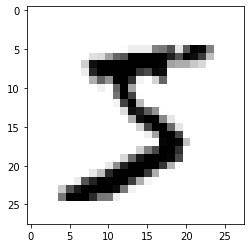

In [8]:
plt.imshow(img, cmap="binary")

<AxesSubplot:>

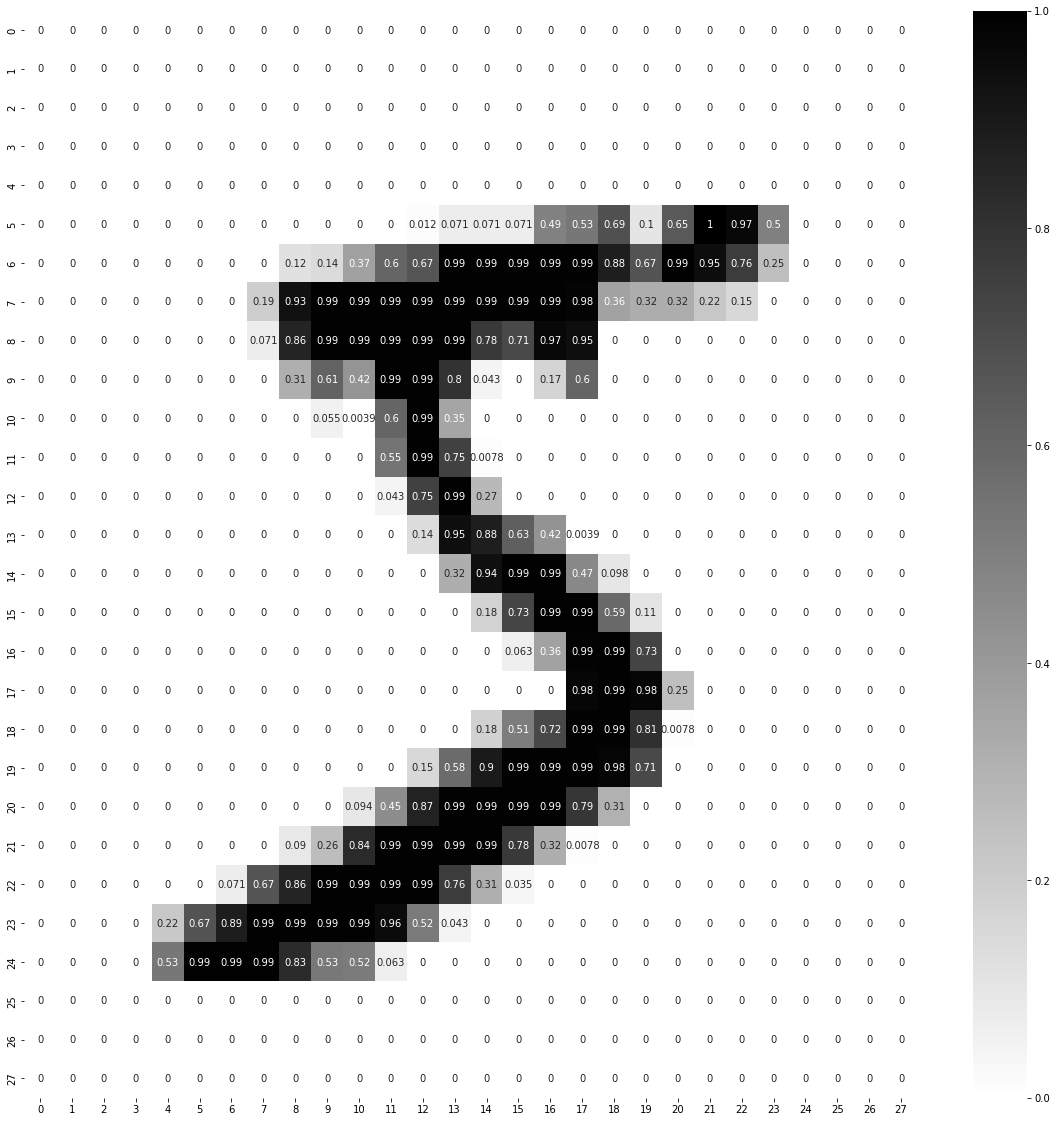

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="binary")

In [11]:
X_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255

In [12]:
CLASSES=10
LAYERS=[
    tf.keras.layers.Flatten(input_shape=(28,28),name="InputLayer"),
    tf.keras.layers.Dense(300, activation="relu", name="HiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu",name="HiddenLayer2"),
    tf.keras.layers.Dense(CLASSES,activation="softmax", name="OutputLayer"),
]

In [13]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [14]:
model_clf.layers

In [16]:
model_clf.layers[1].name

'HiddenLayer1'

In [17]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
weights,bias=model_clf.layers[1].get_weights()

In [19]:
weights

array([[-0.01992596,  0.00098637, -0.04215364, ...,  0.00912011,
         0.00092398,  0.06335992],
       [-0.06549349, -0.01316636,  0.02100265, ...,  0.00485389,
        -0.00422101,  0.06948745],
       [ 0.03464065, -0.03198754,  0.03990166, ...,  0.02941523,
         0.0621189 , -0.05605009],
       ...,
       [-0.04947827,  0.02730223,  0.06298938, ..., -0.02247689,
        -0.06014844, -0.06278336],
       [-0.03154908,  0.03824359, -0.06303666, ...,  0.03175356,
        -0.07141377, -0.06474686],
       [ 0.06191593, -0.03376918,  0.00577724, ...,  0.03418459,
        -0.03998882, -0.04426551]], dtype=float32)

In [20]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
weights.shape

(784, 300)

In [22]:
bias.shape

(300,)

In [23]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, 
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [24]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, 
              epochs=EPOCHS, batch_size=16,
              validation_data=VALIDATION)

Epoch 1/30
3438/3438 [==============================] - 8s 2ms/step - loss: 0.4661 - accuracy: 0.8731 - val_loss: 0.2532 - val_accuracy: 0.9286
Epoch 2/30
3438/3438 [==============================] - 7s 2ms/step - loss: 0.2238 - accuracy: 0.9345 - val_loss: 0.1815 - val_accuracy: 0.9500
Epoch 3/30
3438/3438 [==============================] - 7s 2ms/step - loss: 0.1695 - accuracy: 0.9516 - val_loss: 0.1441 - val_accuracy: 0.9598
Epoch 4/30
3438/3438 [==============================] - 7s 2ms/step - loss: 0.1353 - accuracy: 0.9607 - val_loss: 0.1285 - val_accuracy: 0.9656
Epoch 5/30
3438/3438 [==============================] - 7s 2ms/step - loss: 0.1125 - accuracy: 0.9681 - val_loss: 0.1096 - val_accuracy: 0.9702
Epoch 6/30
3438/3438 [==============================] - 7s 2ms/step - loss: 0.0954 - accuracy: 0.9727 - val_loss: 0.1016 - val_accuracy: 0.9722
Epoch 7/30
3438/3438 [==============================] - 7s 2ms/step - loss: 0.0819 - accuracy: 0.9771 - val_loss: 0.0905 - val_accuracy:

In [25]:
type(history.history)

dict

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.466092,0.873127,0.253164,0.9286
1,0.223834,0.934509,0.181548,0.9500
2,0.169488,0.951636,0.144064,0.9598
3,0.135335,0.960727,0.128465,0.9656
4,0.112495,0.968145,0.109563,0.9702
5,0.095416,0.972655,0.101611,0.9722
6,0.081896,0.977091,0.090496,0.9742
7,0.071464,0.980218,0.084737,0.9756
8,0.062805,0.982218,0.080231,0.9788
9,0.055085,0.984582,0.079865,0.9768


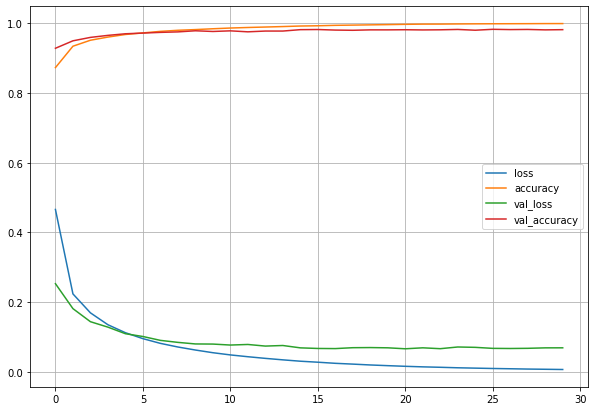

In [30]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [31]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9787


[0.06762557476758957, 0.9786999821662903]

In [32]:
model_clf.save("test.h5")

In [33]:
X_new=X_test[:3]
y_prob=model_clf.predict(X_new)
y_prob.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

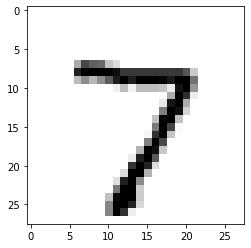

In [34]:
plt.imshow(X_new[0],cmap="binary")

In [38]:
Y_pred=np.argmax(y_prob,axis=-1)

Y_pred

array([7, 2, 1], dtype=int64)

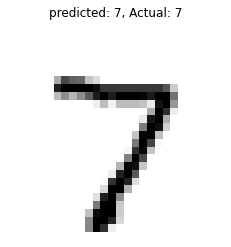

------------------------------------------------------------


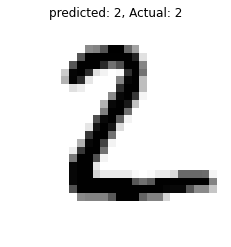

------------------------------------------------------------


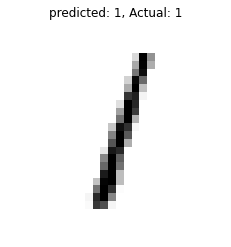

------------------------------------------------------------


In [39]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("--"*30)